#### 鸢尾花数据操作

In [57]:
# 导入数据集
from sklearn.datasets import load_iris
iris = load_iris()
iris_data = iris["data"]
iris_target = iris["target"]
iris_names = iris["feature_names"]

(150, 4)


In [62]:
# 标准化处理
from sklearn.preprocessing import MinMaxScaler
handle = MinMaxScaler().fit(iris_data)  # fit用于训练模型
iris_data_mms = handle.transform(iris_data)

In [35]:
# 模型的构建
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 3, random_state=123).fit(iris_data_mms)

(150, 4)

TSNE(random_state=123)


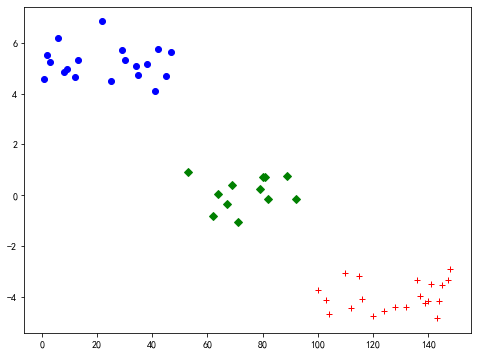

In [73]:
# 可视化展示
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE  
import pandas as pd
# 利用TSNE函数进行降维
tsen = TSNE(n_components=2,init="random",random_state=123).fit(iris_data)
print(tsen)
# 将原始数据转化为数据框
df = pd.DataFrame(tsen.embedding_)
# 将聚类结果放在表格中
df["label"] = model.labels_  # lobels_方法可以得到聚类后的标签
# 绘图
df1 = df[df["label"]==0]
df2 = df[df["label"]==1]
df3 = df[df["label"]==2]
fig = plt.figure(figsize=(8, 6))
plt.plot(df1[0], "r+", df2[0], "bo", df3[0], "gD")
plt.show()

iris数据集聚类聚成2类,FMI分值为0.750473
iris数据集聚类聚成3类,FMI分值为0.820808
iris数据集聚类聚成4类,FMI分值为0.756593
iris数据集聚类聚成5类,FMI分值为0.725483
iris数据集聚类聚成6类,FMI分值为0.602441
iris数据集聚类聚成2类,指数分值为513.924546
iris数据集聚类聚成3类,指数分值为561.627757
iris数据集聚类聚成4类,指数分值为530.765808
iris数据集聚类聚成5类,指数分值为495.541488
iris数据集聚类聚成6类,指数分值为473.850607
iris数据集聚类聚成7类,指数分值为448.116681
iris数据集聚类聚成8类,指数分值为439.483386
iris数据集聚类聚成9类,指数分值为411.545963
iris数据集聚类聚成10类,指数分值为391.371083
iris数据集聚类聚成11类,指数分值为371.022306
iris数据集聚类聚成12类,指数分值为361.460274
iris数据集聚类聚成13类,指数分值为352.929463
iris数据集聚类聚成14类,指数分值为348.645969


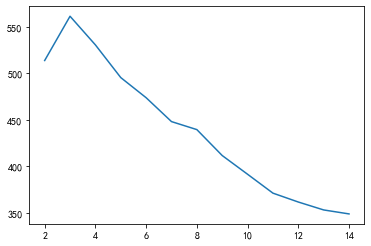

In [74]:
# 模型的评价
# # FMI评价
from sklearn.metrics import fowlkes_mallows_score
for i in range(2, 7):
    model = KMeans(n_clusters=i, random_state=42).fit(iris_data)
    score = fowlkes_mallows_score(iris_target, model.labels_)  # iris_target中是正确的分类，model.labels_是根据模型得到的分类
    print("iris数据集聚类聚成%d类,FMI分值为%f" % (i, score))
# # 指数评价
from sklearn.metrics import calinski_harabasz_score
score1 = []
for i in range(2, 15):
    model = KMeans(n_clusters=i, random_state=42).fit(iris_data)
    score = calinski_harabasz_score(iris_data, model.labels_)
    print("iris数据集聚类聚成%d类,指数分值为%f" % (i, score))
    score1.append(score)
score1
plt.plot(range(2, 15), score1)
plt.show()
# 三类时峰值最高，三类最好